# SIC Class notes
#### Name: Alan Palma

Date: 23th September, 2025

**Retroceso (Backtracking)**

Es una técnica algorítmica para resolver problemas explorando todas las posibles soluciones.
Si una elección lleva a un camino inválido, el algoritmo retrocede al paso anterior y prueba otra alternativa.

Ejemplo: resolver un sudoku o el problema de las N-reinas.

**Búsqueda profunda (Depth-First Search, DFS)**

Es un método de recorrer grafos o árboles que explora lo más lejos posible en cada rama antes de retroceder.

Ejemplo: explorar todas las rutas posibles en un laberinto antes de volver atrás.

**Prometedor (Promising)**

En algoritmos de ramificación y poda (branch and bound) o backtracking, una solución parcial se considera prometedora si todavía puede llevar a una solución válida o mejor.

Ejemplo: en el problema de la mochila, un subconjunto de objetos es prometedor si todavía no excede la capacidad de la mochila.

**Poda (Pruning)**

Es la acción de descartar ramas del árbol de búsqueda que no son prometedoras, ahorrando tiempo de cómputo.

Ejemplo: en ajedrez, el algoritmo minimax con poda alfa-beta ignora jugadas que no cambiarán el resultado final.

### Retroceso (Backtracking)

In [2]:
def es_valido(tablero, fila, columna, n):
    """
    """
    # Verificar la columna
    for i in range(fila):
        if tablero[i][columna] == 1:
            return False
    # Verificar las diagonales
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False

    # Verificar la otra diagonal
    for i, j in zip(range(fila, -1, -1), range(columna, n)):
        if tablero[i][j] == 1:
            return False

    return True

def resolver_n_reinas(tablero, fila, n):
    """
    """
    # Caso base: si todas las reinas están colocadas
    if fila >= n:
        return True

    # Intentar colocar una reina en cada columna de la fila actual
    for columna in range(n):

        # Verificar si es seguro colocar la reina
        if es_valido(tablero, fila, columna, n):
            tablero[fila][columna] = 1

            # Recursivamente intentar colocar reinas en la siguiente fila
            if resolver_n_reinas(tablero, fila + 1, n):
                return True

            tablero[fila][columna] = 0

    return False

n = 4
tablero = [[0 for _ in range(n)] for _ in range(n)]

if resolver_n_reinas(tablero, 0, n):
    for fila in tablero:
        print(fila) 
else:
    print("No hay solución")  

[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]


In [4]:
def resolver_laberinto(laberinto, x, y, solucion):
    """
    """

    n = len(laberinto) 

    # Caso base: si hemos llegado a la esquina inferior derecha
    if x == n - 1 and y == n - 1:
        solucion[x][y] = 1
        return True

    # Verificar si la posición actual es válida
    if x >= 0 and x < n and y >= 0 and y < n and laberinto[x][y] == 0:
        if solucion[x][y] == 1:
            return False  # Ya hemos visitado esta celda
        
        # Marcar la celda como parte de la solución
        solucion[x][y] = 1

        # Moverse hacia adelante en la dirección x
        if resolver_laberinto(laberinto, x + 1, y, solucion):
            return True

        # Moverse hacia abajo en la dirección y
        if resolver_laberinto(laberinto, x, y + 1, solucion):
            return True

        # Moverse hacia atrás en la dirección x
        if resolver_laberinto(laberinto, x - 1, y, solucion):
            return True

        # Moverse hacia arriba en la dirección y
        if resolver_laberinto(laberinto, x, y - 1, solucion):
            return True

        # Si ninguna de las opciones funciona, desmarcar la celda (backtrack)
        solucion[x][y] = 0
        return False

    return False

laberinto = [
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [1, 0, 1, 0],
    [0, 0 , 0, 0]
]

n = len(laberinto)
solucion = [[0]*n for _ in range(n)]

if resolver_laberinto(laberinto, 0, 0, solucion):
    print("Se encontró una solución:")
    for fila in solucion:
        print(fila)
else:
    print("No se encontró solución.")

Se encontró una solución:
[1, 0, 0, 0]
[1, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 1, 1]


### Pandas, Numpy, Matplotlib
Date: 25 September, 2025 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
ciudades = ["Tokio", "Delhi", "Shanghai", "Quito", "Ciudad de México"]
poblacion = [37.4, 31.0, 27.1, 22.2, 21.9]

series = pd.Series(poblacion)

print("\n" + "="*50)
print("Serie básica (index por defecto)")
print("="*50)


print(series)


Serie básica (index por defecto)
0    37.4
1    31.0
2    27.1
3    22.2
4    21.9
dtype: float64


In [17]:
serie_poblacion_nombre = pd.Series(poblacion, index=ciudades)

print("\n" + "="*50)
print("Serie con nombres de ciudades como índice")
print("="*50)


print(serie_poblacion_nombre)


Serie con nombres de ciudades como índice
Tokio               37.4
Delhi               31.0
Shanghai            27.1
Quito               22.2
Ciudad de México    21.9
dtype: float64


In [30]:
print("\n" + "="*50)
print("Creación de una serie a partir de un diccionario")
print("="*50)

areas_km2 = {
    "Tokio": 2191,
    "Delhi": 1484,
    "Shanghai": 6340,
    "Quito": 1521,
    "Ciudad de México": 1485
}

series_area = pd.Series(areas_km2, name="Área (km²)")
print(series_area)


Creación de una serie a partir de un diccionario
Tokio               2191
Delhi               1484
Shanghai            6340
Quito               1521
Ciudad de México    1485
Name: Área (km²), dtype: int64


In [31]:
print("\n" + "="*50)
print("Creación de una serie desde numpy")
print("="*50)

temperaturas = np.array([15.4, 25.0, 16.5, 21.0, 17.5])
series_temp = pd.Series(temperaturas, index=ciudades, name="Temperatura Promedio (°C)")

print(series_temp)


Creación de una serie desde numpy
Tokio               15.4
Delhi               25.0
Shanghai            16.5
Quito               21.0
Ciudad de México    17.5
Name: Temperatura Promedio (°C), dtype: float64


In [32]:
# Acceso a elementos de una serie por posición
print("\n" + "="*50)
print("Acceso a elementos de una serie)")
print("="*50)

print("Serie Completa")
print(series_temp)

# Acceso a elementos de una serie por posición
print("\nElemento en la posición 0 (Tokio):", series_temp.iloc[0])
print("Último elemento (Ciudad de México):", series_temp.iloc[-1])

# Acceso a elementos de una serie por etiqueta
print("\nElemento en la etiqueta 'Tokio':", series_temp.loc["Tokio"])
print("Elemento en la etiqueta 'Ciudad de México':", series_temp.loc["Ciudad de México"]) 

# Rebanadas (slicing)
print("\nRebanada de la posición 1 a 3 (Delhi a Shanghai):")
print(series_temp.iloc[1:4])



Acceso a elementos de una serie)
Serie Completa
Tokio               15.4
Delhi               25.0
Shanghai            16.5
Quito               21.0
Ciudad de México    17.5
Name: Temperatura Promedio (°C), dtype: float64

Elemento en la posición 0 (Tokio): 15.4
Último elemento (Ciudad de México): 17.5

Elemento en la etiqueta 'Tokio': 15.4
Elemento en la etiqueta 'Ciudad de México': 17.5

Rebanada de la posición 1 a 3 (Delhi a Shanghai):
Delhi       25.0
Shanghai    16.5
Quito       21.0
Name: Temperatura Promedio (°C), dtype: float64


In [55]:
print(type(series_temp))

<class 'pandas.core.series.Series'>


In [33]:
print("\n" + "="*50)
print("Operaciones aritméticas con Series")
print("="*50)

serie_poblacion_habitantes = serie_poblacion_nombre * 1_000_000
serie_poblacion_habitantes.name = "Población (millones)"
print("Población en habitantes:")
print(serie_poblacion_habitantes)

densidad_poblacional = serie_poblacion_habitantes / series_area
densidad_poblacional.name = "Densidad Poblacional (hab/km²)"
print("\nDensidad Poblacional (hab/km²):")
print(densidad_poblacional)


Operaciones aritméticas con Series
Población en habitantes:
Tokio               37400000.0
Delhi               31000000.0
Shanghai            27100000.0
Quito               22200000.0
Ciudad de México    21900000.0
Name: Población (millones), dtype: float64

Densidad Poblacional (hab/km²):
Tokio               17069.831127
Delhi               20889.487871
Shanghai             4274.447950
Quito               14595.660750
Ciudad de México    14747.474747
Name: Densidad Poblacional (hab/km²), dtype: float64


In [38]:
print("\n" + "="*50)
print("Estadísticas descriptivas")
print("="*50)

print(f"Media de población (millones): {serie_poblacion_nombre.mean():.2f}")
print(f"Mediana de población (millones): {serie_poblacion_nombre.median():.2f}")
print(f"Desviación estándar de población (millones): {serie_poblacion_nombre.std():.2f}")
print(f"Población mínima (millones): {serie_poblacion_nombre.min():.2f}")
print(f"Población máxima (millones): {serie_poblacion_nombre.max():.2f}")
print(f"Suma total de población (millones): {serie_poblacion_nombre.sum():.2f}")

print("Estadísticas por densidad poblacional (hab/km²):")
print(f"Media de densidad poblacional (hab/km²): {densidad_poblacional.mean():.2f}")
print(f"Densidad poblacional mínima (hab/km²): {densidad_poblacional.min():.2f}")
print(f"Densidad poblacional máxima (hab/km²): {densidad_poblacional.max():.2f}")


Estadísticas descriptivas
Media de población (millones): 27.92
Mediana de población (millones): 27.10
Desviación estándar de población (millones): 6.50
Población mínima (millones): 21.90
Población máxima (millones): 37.40
Suma total de población (millones): 139.60
Estadísticas por densidad poblacional (hab/km²):
Media de densidad poblacional (hab/km²): 14315.38
Densidad poblacional mínima (hab/km²): 4274.45
Densidad poblacional máxima (hab/km²): 20889.49



Visualización de datos


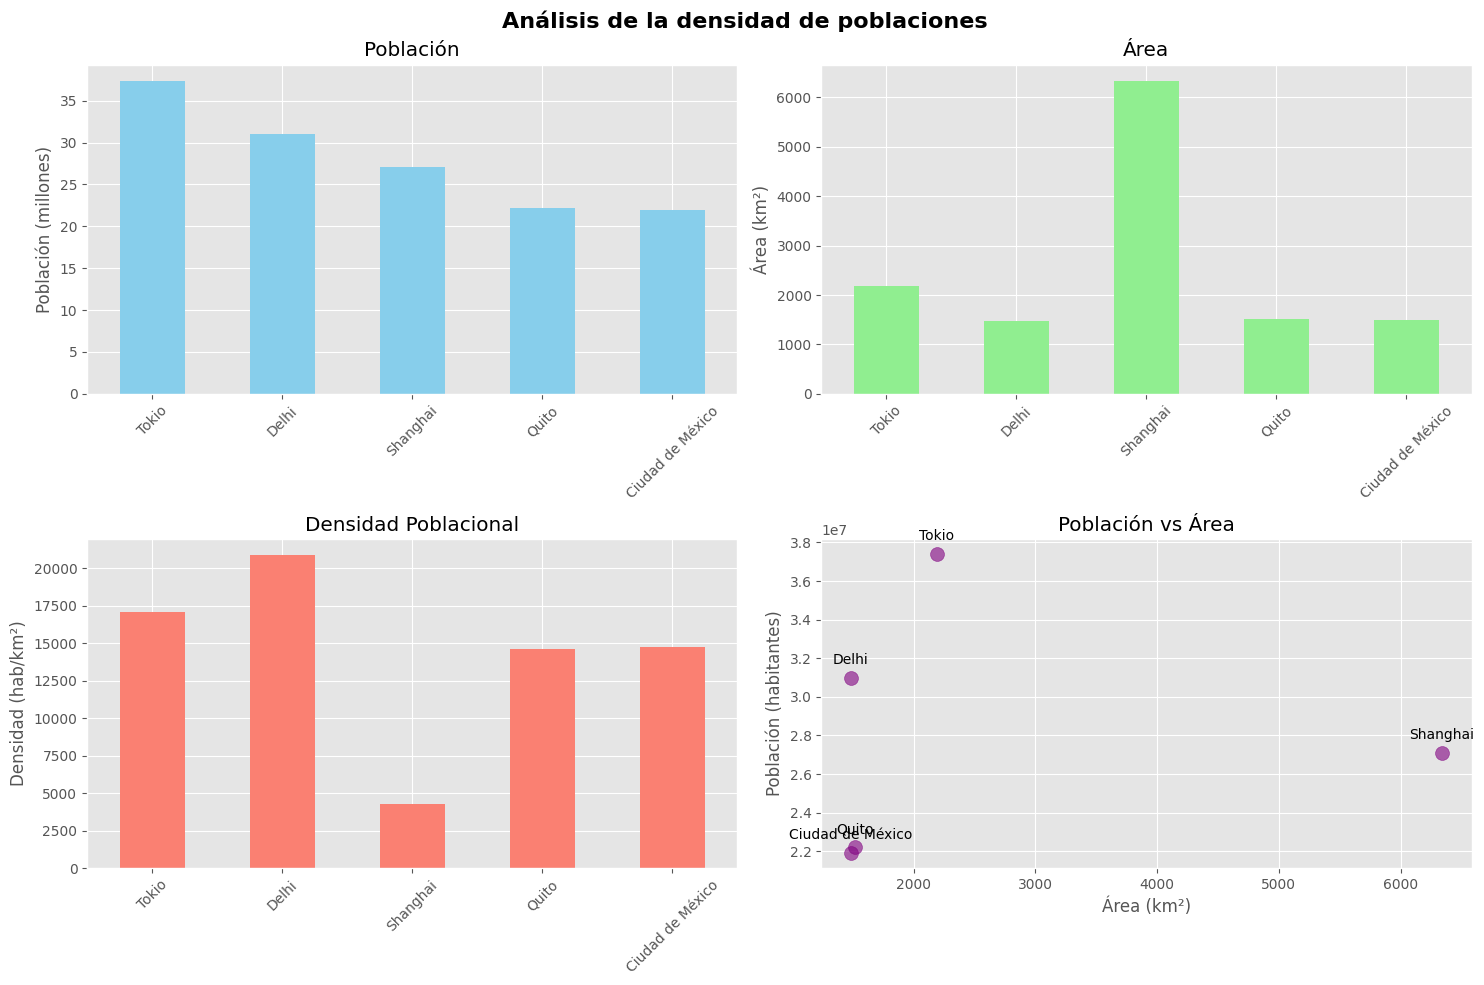

In [53]:
print("\n" + "="*50)
print("Visualización de datos")
print("="*50)

plt.style.use('ggplot')
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

fig.suptitle("Análisis de la densidad de poblaciones", fontsize=16, fontweight='bold')

serie_poblacion_nombre.plot(kind='bar', ax=ax1, color='skyblue', title='Población')
ax1.set_ylabel('Población (millones)')
ax1.tick_params(axis='x', rotation=45)

series_area.plot(kind='bar', ax=ax2, color='lightgreen', title='Área')
ax2.set_ylabel('Área (km²)')
ax2.tick_params(axis='x', rotation=45)

densidad_poblacional.plot(kind='bar', ax=ax3, color='salmon', title='Densidad Poblacional')
ax3.set_ylabel('Densidad (hab/km²)')
ax3.tick_params(axis='x', rotation=45)

ax4.scatter(series_area, serie_poblacion_habitantes, color='purple', s=100, alpha=0.6)
for i, ciudad in enumerate(ciudades):
    ax4.annotate(ciudad, (series_area.iloc[i], serie_poblacion_habitantes.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')
ax4.set_title('Población vs Área')
ax4.set_xlabel('Área (km²)')
ax4.set_ylabel('Población (habitantes)')

plt.tight_layout()
plt.show()

Ejecicio: Fruteria

In [56]:
nombre_frutas = ["Manzana", "Banana", "Cereza", "Sandía", "Aguacate", "Uvas"]
precio_frutas = [0.5, 0.3, 1.2, 3.0, 2.5, 2.0]  # Precio por kilogramo

serie_frutas = pd.Series(precio_frutas, index=nombre_frutas, name="Precio por kg (USD)")

print(serie_frutas)

Manzana     0.5
Banana      0.3
Cereza      1.2
Sandía      3.0
Aguacate    2.5
Uvas        2.0
Name: Precio por kg (USD), dtype: float64


In [57]:
print("Promedio de precios por kg (USD):", serie_frutas.mean())
print("Fruta más cara:", serie_frutas.idxmax(), "con un precio de", serie_frutas.max(), "USD/kg")
print("Fruta más barata:", serie_frutas.idxmin(), "con un precio de", serie_frutas.min(), "USD/kg")

Promedio de precios por kg (USD): 1.5833333333333333
Fruta más cara: Sandía con un precio de 3.0 USD/kg
Fruta más barata: Banana con un precio de 0.3 USD/kg


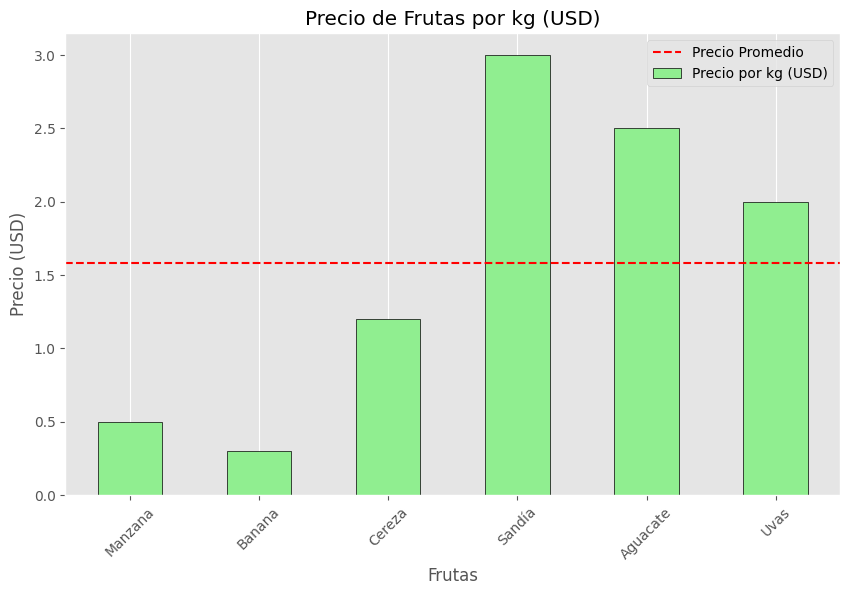

In [71]:
plt.figure(figsize=(10, 6))

serie_frutas.plot(kind='bar', color='lightgreen', edgecolor='black', title='Precio de Frutas por kg (USD)')
plt.axhline(serie_frutas.mean(), color='red', linestyle='--', label='Precio Promedio')
plt.ylabel('Precio (USD)')
plt.xlabel('Frutas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()